# CS-UY 3943 - Introduction of Data Science
## Week 5: Linear Regression

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name: Lenny Remache
NetID: ljr381
Group (Letter): B 
Group Member 1: Jimmy Pacheco
Group Member 2: Abdelkarim 
***

### Introduction
Returning to the home sale prices dataset from the previous assignment, consider the goal of building a model that can use characteristics of a home to predict the price for which it will sell. The dataset has been modified so that the target value is the price (in dollars) per square foot (sq. ft.) for each home instead of the raw sale price for each home. The data consists of 81 total features for each home and 1,460 home sales in the dataset. Your goal for this assignment is to choose the feature that best predicts the price per square foot of a home from the 80 available predictive features. The 81 original features are described in the document **data_description.txt** provided in your repo. The file **housing_data_mod.csv** contains the field `PricePerSqFt` in place of `SalePrice`. The square foot value used to calculate this value is the sum of the values of the following features: `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `WoodDeckSF`, and `OpenPorchSF`.

1\. Read in the data contained in the file **housing_data_mod.csv** as a `pandas DataFrame`. Imagine that you only have the ability to select one of the 80 features to use for predicting the price of a home (represented as the price per sq. ft.). Which one of the features would you select and why? (Be sure to include code providing data and/or visualizations to justify your choice).

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

houseDF = pd.read_csv('housing_data_mod.csv')

columns = houseDF.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [96]:
houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PricePerSqFt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,79.368100
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,64.316088
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,81.331878
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,55.821372
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,69.079856


In [81]:
pricePerSqFt = houseDF['PricePerSqFt']

corr = {}
for column in columns:
    if houseDF[column].dtype == 'int64':
        corr[column] = (np.corrcoef(houseDF[column],pricePerSqFt)[0][1])
        print(column, ':', corr[column])

corrKeys = corr.keys()
corrVals = corr.values()

corrMax =  max(corrVals)
for key in corrKeys:
    if corr[key] == corrMax:
        keyMax = key
print('\nStrongest Correlation with PricePerSqFt is', keyMax, ' : ', corrMax)
    

Id : -0.022204271732258203
MSSubClass : -0.02468373462930616
LotArea : 0.07667338543888147
OverallQual : 0.4861304415584638
OverallCond : 0.07328605672617222
YearBuilt : 0.47442601502934284
YearRemodAdd : 0.44475394228521314
BsmtFinSF1 : 0.17821172349399206
BsmtFinSF2 : -0.08890802572449545
BsmtUnfSF : -0.14231663314042958
TotalBsmtSF : 0.00924181037990298
1stFlrSF : 0.05958300760603901
2ndFlrSF : 0.0921871012330918
LowQualFinSF : -0.05986360912247595
GrLivArea : 0.11487697735119747
BsmtFullBath : 0.14378675737900617
BsmtHalfBath : -0.01713961655975193
FullBath : 0.23750765791869846
HalfBath : 0.16494497279347828
BedroomAbvGr : -0.16258925149466083
KitchenAbvGr : -0.22239817255104508
TotRmsAbvGrd : 0.04205054293325226
Fireplaces : 0.19238315654921131
GarageCars : 0.41352839131741337
GarageArea : 0.36942784873482215
WoodDeckSF : 0.01649501433608578
OpenPorchSF : 0.05306505621033392
EnclosedPorch : -0.16136792987135107
3SsnPorch : 0.045004596701547134
ScreenPorch : 0.06189557425412697
Po

<p>
<span style="color:blue">
The feature we chose is OverallQual because it has the highest and strongest correlation coefficient value out of all the columns that provide us with numeric values not string values. 
</span>
</p>

2\. Make a scatter plot for the chosen feature to visually explore the relationship between your chosen feature and `PricePerSqFt`. Place the chosen feature on the x-axis and the sale price per sq. ft. on the y-axis. Don't forget to label your axes and give the plot a title.

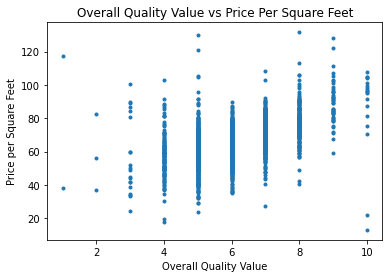

In [82]:

overallQual = houseDF[keyMax]
_ = plt.plot(overallQual,pricePerSqFt,marker='.',linestyle='none')
_ = plt.xlabel('Overall Quality Value')
_ = plt.ylabel('Price per Square Feet')
_ = plt.title('Overall Quality Value vs Price Per Square Feet')
plt.show()

3\. Estimate the parameters of a least-squares linear regression model (slope and intercept) using the feature selected in Question 1 to predict the price per sq. ft. of a home in the market. 
* Output the estimated slope and intercept of the model
* Plot the model's trend line on a scatter plot of the features as constructed in Question 2
* Using simple language, explain what the model says about the relationship between the chosen feature and the price per square foot of a home in the market

In [92]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

model = ols(formula='PricePerSqFt~OverallQual', data=houseDF)

model = model.fit()

intercept = model.params['Intercept']
slope = model.params['OverallQual']
print('Intercept: ', intercept)
print('Slope: ', slope)


Intercept:  35.65914199531088
Slope:  5.044136389474748


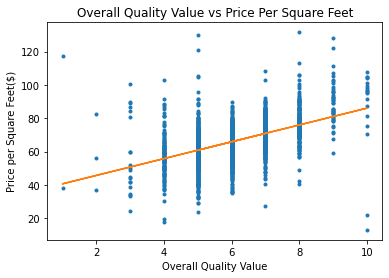

r = 0.4861304415584638


In [95]:
overallQual = houseDF[keyMax]
_ = plt.plot(overallQual,pricePerSqFt,marker='.',linestyle='none')
_ = plt.xlabel('Overall Quality Value')
_ = plt.ylabel('Price per Square Feet($)')
_ = plt.title('Overall Quality Value vs Price Per Square Feet')
_ = plt.plot(overallQual, overallQual*slope+intercept)
plt.show()

print('r =', corrMax)

<p>
Generally, as the overal quality of a house increases the price per square foot of a house also increases. Which can be supported by the correlation coefficient value of 0.48 which is a moderate postive correlation between overall quality and price per square foot. 
</span>
</p>

4\. While visualizing the relationship between the features is helpful, using a statistical test can determine if the relationship is due to random chance or actually exists. Before performing the statistical test, begin by exploring how the data might change if repeating the sale of homes (sampling) from the same population of homes on the market. For this question complete the following steps:

* Generate 10,000 bootstrap replicates of the slope and intercept for your chosen feature and the price per sq. ft. 
* Plot the distribution of bootstrap slope and intercept replicates on separate plots
* Plot the first 200 lines formed by the bootstrap replicates for the slope and intercept on a scatter plot to visualize the variability in the replicates

In [102]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


In [109]:
bs_replicates = draw_bs_pairs_linreg(overallQual,pricePerSqFt,10000)

slopeReps = bs_replicates[0]
interReps = bs_replicates[1]
print(slopeReps)
print(interReps)

[5.15409241 5.83655201 5.16663051 ... 4.93370811 5.73812829 4.92383104]
[34.85409794 31.05289078 35.4083113  ... 36.26576494 31.19567117
 36.14926306]


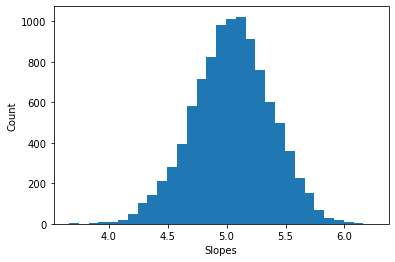

In [117]:
_ = plt.hist(slopeReps,bins=31)
_ = plt.xlabel('Slopes')
_ = plt.ylabel('Count')
plt.show()

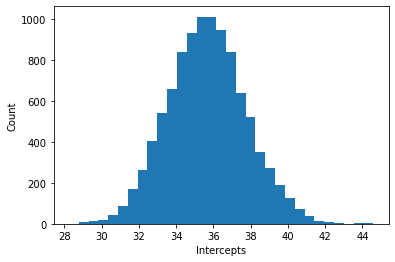

In [118]:
_ = plt.hist(interReps, bins=31)
_ = plt.xlabel('Intercepts')
_ = plt.ylabel('Count')
plt.show()

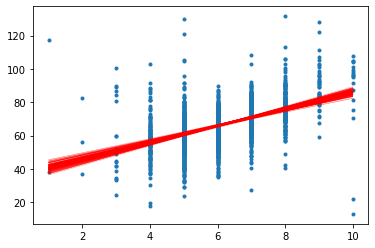

In [139]:
_ = plt.plot(overallQual, pricePerSqFt, marker='.', linestyle='none')
for i in range(200):
    _ = plt.plot(overallQual,slopeReps[i]*overallQual + interReps[i],linewidth=0.5, alpha=0.2, color='red')


5\. Develop a hypothesis test for the strength of the relationship between the selected feature and a homes price per sq. ft. Recall the steps required for defining and executing a hypothesis test:

* State the null hypothesis
* Define a test statistic
* Generate many data sets assuming the null hypothesis is true
* Compute the test statistic for each data set
* Compute a p-value as the fraction of the simulated data sets with a test statistic as extreme as the one observed
* Evaluate how likely the null hypothesis is given the calculated p-value

<p>
<span style="color:blue">
Null hypothesis: There is no linear replationship between overall quality and price per square feet.</span>
</p>

<p>
<span style="color:blue">
Test Statistic: Correlation Coefficient -> 0.48
</span>
</p>

In [140]:
testStatistic = np.corrcoef(overallQual, pricePerSqFt)
print(testStatistic[0][1])

0.4861304415584638


In [141]:

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_corrcoef(data_1, data_2):
    diff = np.corrcoef(data_2)-np.corrcoef(data_1)

    return diff

In [147]:
empirical_diff_corrcoef = diff_of_corrcoef(overallQual,pricePerSqFt)

perm_replicates = draw_perm_reps(overallQual,pricePerSqFt,diff_of_corrcoef, size=10000)

p = np.sum(perm_replicates <= empirical_diff_corrcoef) / len(perm_replicates)

print('p:',p)

p: 1.0


<p>
<span style="color:blue">
Evaluate the null hypothesis here
</span>
</p>

6\. Goodness of fit statistics allow for the evaluation of how well a model fits observed data. To determine how well a model using the chosen feature predicts the price per square foot for a home, calculate and output the root mean-squared error (RMSE) and R^2 statistics for the model.  

For RMSE:
* use the slope and intercept estimated previously to calculate the predicted price per square foot
* calculate the residuals between the predicted model and observed values
* use the calculated residuals to compute the RMSE without using a function provided in a Python package  

For R^2:
* calculate the variance in the price per square foot
* calculate the variance in the residuals
* use the two variance values to compute R^2 without using a function provided in a Python package

What do the values of these statistics indicate about the appropriateness of the model for predicting the price per square foot for homes in the market?

In [ ]:
# Place code here

<p>
<span style="color:blue">
Place response here
</span>
</p>